<a href="https://colab.research.google.com/github/LucianoBV/Procesamiento-del-habla/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📚 Aprendizaje Automático | 📊 Clustering
#👩‍🏫 Docente: Ingeniera en Sistemas Ana Diedrichs
#👨‍🎓 Alumno: Vargas Luciano


## Presentación y descripción del dataset.
### Data set elegido: Facebook Live Sellers in Thailand

Es un conjunto de datos de Páginas de Facebook de 10 vendedores minoristas tailandeses de moda y cosméticos. Publicaciones de diferente naturaleza (video, fotos, estados y enlaces). Las métricas de participación consisten en comentarios, acciones y reacciones.


In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA


In [171]:
# Cargamos el dataset
data = pd.read_csv("https://archive.ics.uci.edu/static/public/488/facebook+live+sellers+in+thailand.zip")

In [172]:
# Mostramos información general del DataFrame y las 5 primeras filas
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

### El conjunto de datos contiene 16 columnas y 7050 filas. A continuación, se describen las principales observaciones y el pre-procesamiento:
Verificacion de valores nulos:
Columnas innecesarias: Las columnas "Column1", "Column2", "Column3" y "Column4" no contienen valores y se van a eliminar.

Tipo de datos:
La columna status_published se convierte a formato datetime para facilitar análisis.

Normalización de nombres de columnas: renombrar las columnas para visualizar mejor.

In [174]:
# Eliminamos las columnas vacías y columnas que no nos interesan para el analisis
df = data.drop(columns=["Column1", "Column2", "Column3", "Column4", "num_hahas", 'num_wows', 'num_loves', 'num_sads','num_angrys','status_published' ])

In [175]:
# Renombramos las columnas para mejorar la visualización
df.rename(columns={
    'status_id': 'id',
    'status_type': 'type',
    'status_published': 'published',
    'num_reactions': 'reactions',
    'num_comments': 'comments',
    'num_shares': 'shares',
    'num_likes': 'likes',
}, inplace=True)

# Objetivo

Tiene como objetivo crear un sistema de optimización de publicaciones en redes sociales que ajuste el contenido a diferentes segmentos de audiencia. El clustering permite dividir la audiencia en grupos específicos con preferencias similares.

Clustering para Segmentación de Audiencia:

Se comienza con un análisis de clustering sobre los datos históricos de publicaciones, agrupando usuarios o interacciones según características similares (tipo de publicación preferida, nivel de interacción, etc.).
Estos clusters representan diferentes perfiles de audiencia que pueden responder de manera distinta a los tipos de contenido.

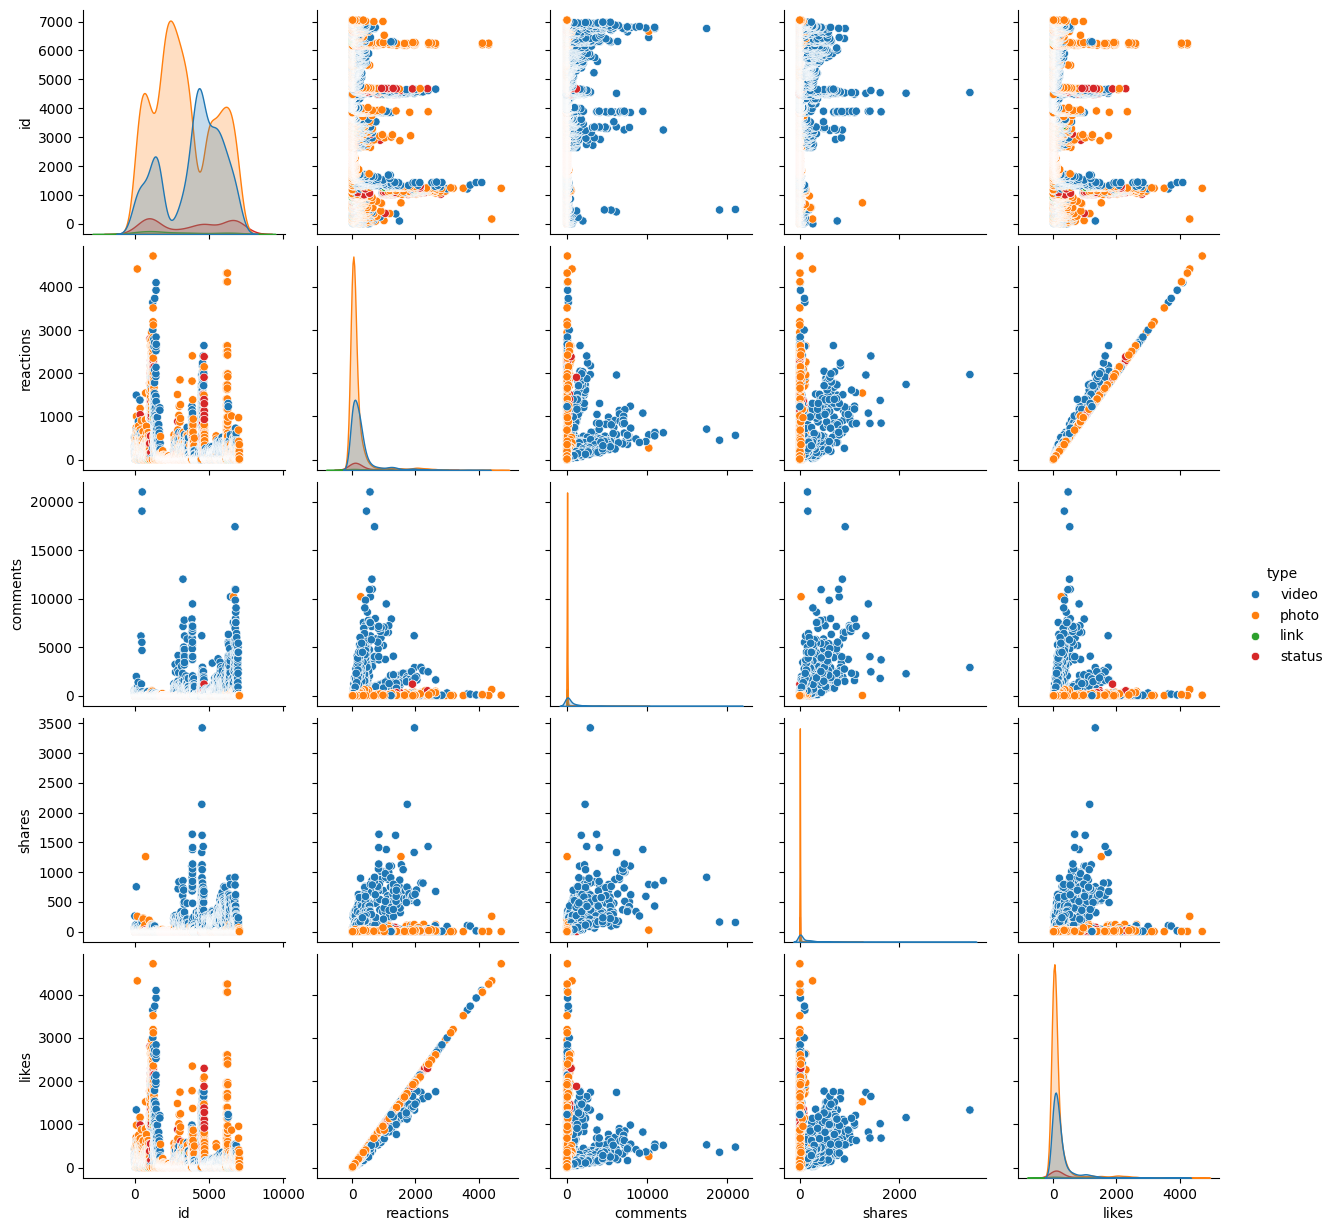

In [176]:
# Generamos un grafico de pares para ver la relacion enentre todas las variables numéricas del df, utilizando la columna type para distinguir entre diferentes tipos de publicaciones mediante puntos de colores.
sns.pairplot(df,hue='type');

SE realiza un análisis de clustering K-Means sobre las interacciones de las publicaciones de Facebook (reacciones, compartidos, comentarios y likes). Se estandarizan los datos para asegurar una comparación justa entre las variables. Se busca dividir las publicaciones en 4 grupos (clusters) según sus patrones de interacción. Finalmente, se visualizan los clusters en un gráfico de dispersión, mostrando cómo se agrupan las publicaciones en función de sus reacciones y likes, y la ubicación de los centroides de cada cluster.

<ipython-input-177-97c8131c466e>:15: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=labels,legend='full',palette=sns.color_palette("hls", 5));


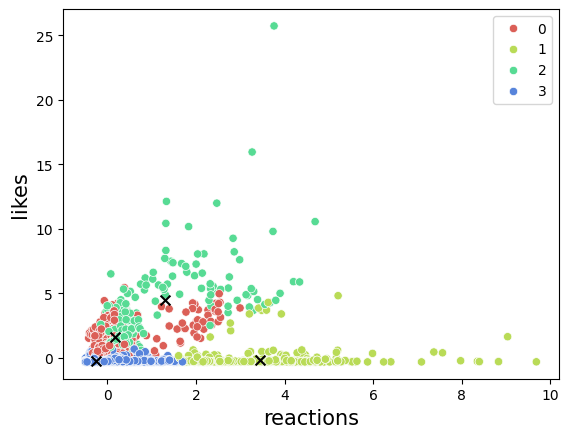

In [177]:
# Se crea una nueva variable X que contiene solo 4 columnas del df. Estas serán las características utilizadas para el clustering.
X=df[['reactions', 'shares', 'comments', 'likes']]

# Estandarizamos los datos creando el objeto scaler de la clase stanScaler y se guarda en X_scaled.
# Esto asegura que tengamos la misma escala
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X);
# Se crea un objeto kmeans para realizar el clustering con k=4 (se buscan 4 clusters)
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(X_scaled)
labels = kmeans.labels_ # Etiquetas
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides
# Se utiliza seaborn para crear un gráfico de dispersión que visualiza los clusters.
# Se marcan los centroides con una 'x' negra.
sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=labels,legend='full',palette=sns.color_palette("hls", 5));
plt.xlabel('reactions',fontsize=15);plt.ylabel('likes',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

En términos del objetivo del proyecto esta parte del código ayuda a identificar diferentes tipos de publicaciones, lo cual es un primer paso para segmentar la audiencia y optimizar el contenido para cada segmento. Por ejemplo, un cluster con alto número de reacciones y compartidos podría indicar un tipo de contenido viral que atrae a una audiencia amplia, mientras que un cluster con alto número de comentarios podría indicar un contenido que genera debate o discusión entre un grupo más específico.

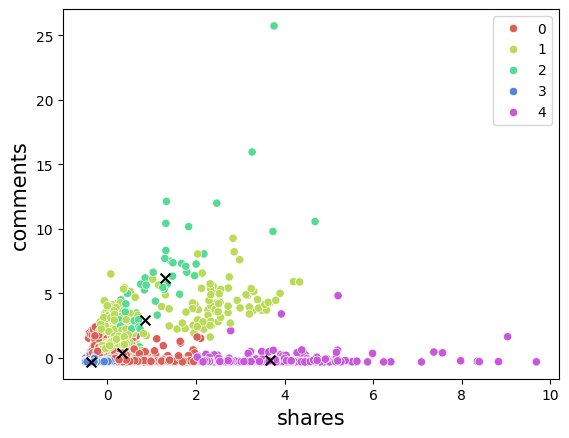

In [178]:
X=df[['reactions', 'shares', 'comments', 'likes']]
# Se crea un objeto kmeans para realizar el clustering con k=5 (se buscan 5 clusters)
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=labels,legend='full',palette=sns.color_palette("hls", 5));
plt.xlabel('shares',fontsize=15);plt.ylabel('comments',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

Ahora, se busca determinar el número óptimo de clusters para el algoritmo K-Means utilizando el método del codo.
Se crea una lista vacía llamada sq_distances para almacenar la suma de las distancias cuadráticas (inercia) de cada cluster y e define un rango de valores para k (número de clusters) desde 2 hasta 9.

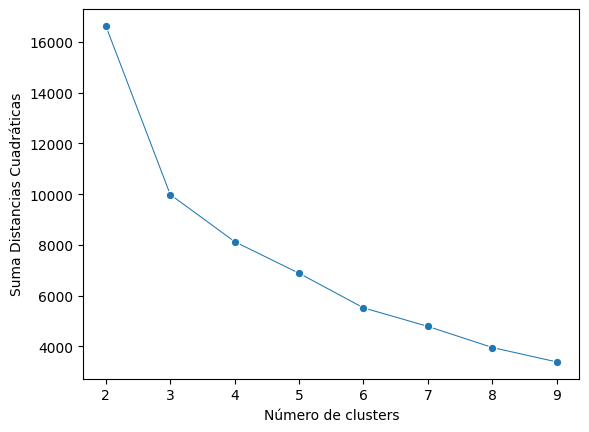

In [179]:
sq_distances=[]
k_values=range(2,10);
# Se itera sobre cada valor de k en el rango definido.
for k in k_values:
    # # Se crea un objeto kmeans con el valor actual de k y una semilla aleatoria (random_state=0) para asegurar la reproducibilidad.
    kmeans=KMeans(n_clusters=k,random_state=0)

    kmeans.fit(X_scaled)# Se ajusta el modelo K-Means a los datos escalados

    # Se agrega la inercia del modelo (suma de las distancias cuadráticas de cada punto a su centroide) a la lista sq_distances.
    sq_distances.append(kmeans.inertia_)
    # Se crea un gráfico de línea que muestra la relación entre el número de clusters (k_values) y la inercia (sq_distances). Se agregan marcadores circulares ('o')
sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');

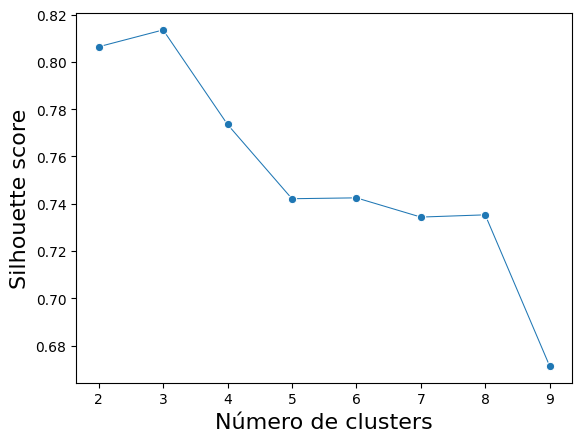

In [180]:
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X_scaled)
    score=silhouette_score(X_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=33,legend=False);
plt.ylabel('Silhouette score',fontsize=16);plt.xlabel('Número de clusters',fontsize=16);

El gráfico generado muestra la disminución de la inercia a medida que aumenta el número de clusters. El objetivo es encontrar el punto en el gráfico donde la disminución de la inercia se vuelve menos significativa, asemejándose a un codo. Este punto sugiere un número óptimo de clusters, ya que agregar más clusters no proporcionaría una mejora sustancial en la agrupación de los datos.
En nuestro caSO seria 5.

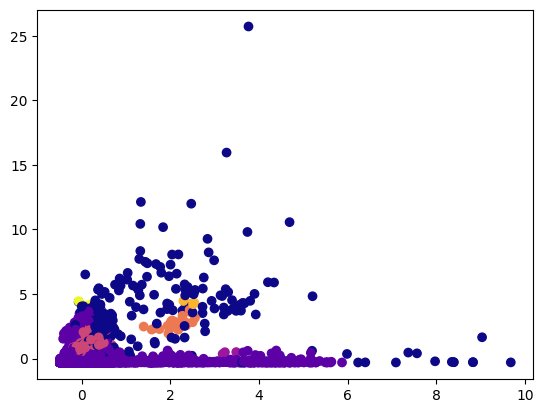

In [181]:
# eps=0.5: este parámetro define la distancia máxima entre dos muestras para que se consideren vecinas.
# En este caso, si dos puntos están a una distancia menor o igual a 0.5, se consideran parte del mismo cluster.
# min_samples=5; este parámetro define el número mínimo de muestras en un vecindario para que un punto se considere un punto central.
# Si un punto tiene al menos 5 vecinos dentro de una distancia eps, se considera un punto central y se inicia un nuevo cluster a partir de él.
dbscan = DBSCAN(eps=0.5, min_samples=5)
# SE aplica el algoritmo DBSCAN a los datos escalados (X_scaled) y se obtiene las etiquetas de cluster para cada punto de datos.
# El resultado se guarda en la variable clusters.
clusters = dbscan.fit_predict(X_scaled)
# Visualizar clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='plasma')
plt.show()


El algoritmo DBSCAN permite identificar clusters en los datos basándose en la densidad de los puntos. La visualización permite observar cómo los puntos se agrupan en diferentes clusters y si hay puntos considerados como ruido (outliers).
Ademas puede encontrar clusters de formas arbitrarias.

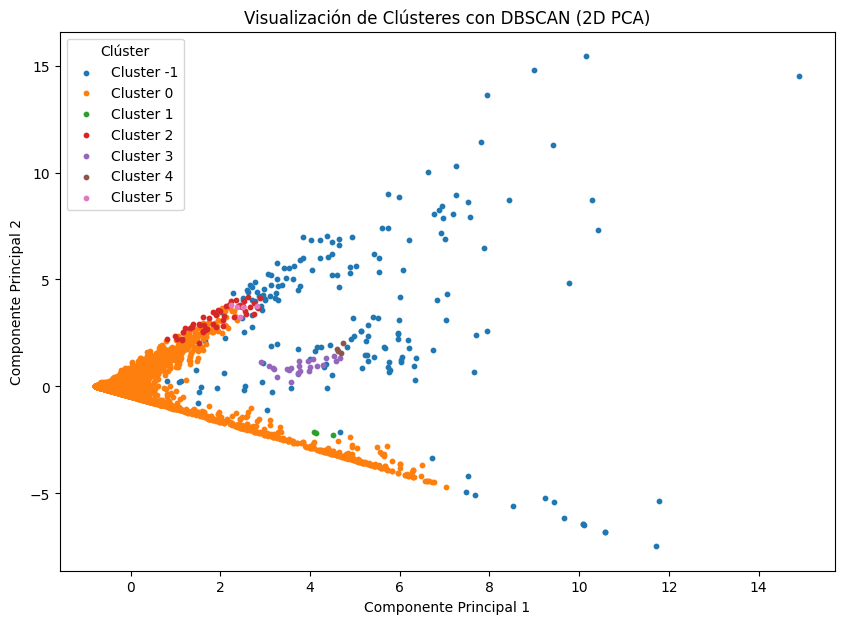

In [182]:
# Usar PCA para reducir las dimensiones a 2 para visualización
from sklearn.decomposition import PCA
# Se crea un objeto pca, especificando que se desean reducir las dimensiones a 2 (n_components=2).
# Esto es que se buscarán los 2 componentes principales que mejor representen la varianza de los datos.
pca = PCA(n_components=2)
# Se aplica el PCA a los datos escalados (X_scaled) utilizando el método fit_transform.
# Esto calcula las componentes principales y transforma los datos a un nuevo espacio de 2 dimensiones.
# data_pca ahora contiene los datos proyectados en las 2 componentes principales.
data_pca = pca.fit_transform(X_scaled)

# Asignar los clústeres a los puntos
# Se utiliza np.unique para obtener una lista de los clústeres únicos identificados por el algoritmo DBSCAN.
unique_clusters = np.unique(clusters)

plt.figure(figsize=(10, 7))

# Graficar cada clúster con un color diferente
for cluster in unique_clusters: # Se itera sobre cada clúster.
    # Filtrar puntos por clúster
    cluster_points = data_pca[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', s=10)

# Configuración del gráfico
plt.title("Visualización de Clústeres con DBSCAN (2D PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clúster")
plt.show()


## Conclusión del Análisis:
El análisis realizado sobre el dataset "Facebook Live Sellers in Thailand" utilizando técnicas de clustering, K-means y DBSCAN, nos permite extraer las siguientes conclusiones:

1. Identificación de patrones de interacción: Mediante K-Means, se logró identificar grupos de publicaciones con patrones similares en función de reacciones, comentarios, compartidos y likes. Esto muestra los diferentes tipos de contenido que generan distintos niveles de agrado en la audiencia.

2. Número óptimo de clusters: El análisis del método del codo y el Silhouette score indicaron que 5 clusters podrían ser una segmentación adecuada para este dataset.

3. Visualización de clusters: La aplicación de PCA para reducir la dimensionalidad y la visualización de los clusters generados por K-Means y DBSCAN permitieron observar la distribución de las publicaciones y la formación de grupos con características diferenciadas.

4. Segmentación de audiencia y optimización de contenido: Los resultados obtenidos contribuyen al objetivo principal del proyecto, ya que la identificación de clusters permite segmentar la audiencia en grupos con preferencias e interacciones similares. Esto abre la posibilidad de optimizar el contenido para cada segmento, maximizando la efectividad de las publicaciones.

5. DBSCAN y la detección de outliers: El algoritmo DBSCAN permitió identificar clusters de formas arbitrarias y detectar outliers, lo cual complementa el análisis realizado con K-Means.

Esta información puede ser utilizada para segmentar la audiencia, optimizar el contenido y mejorar la efectividad de las estrategias de marketing en redes sociales.